In [1]:
import os
import pandas as pd
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
folderpath = './data_bi/'
filepath = folderpath + 'patents_with_title.csv'
data = pd.read_csv(filepath , sep = ";", usecols = ['patent_number','assignee_organization','cpc_group_id'])
data.head()

C:\Users\tom-n\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,patent_number,assignee_organization,cpc_group_id
0,10013573,International Business Machines Corporation,G06F
1,10013573,International Business Machines Corporation,H04L
2,10013573,International Business Machines Corporation,G06F
3,10013573,International Business Machines Corporation,H04L
4,10022613,NaN,A41D


In [3]:
# Duplikate entfernen
assignee_blockchain = data.drop_duplicates(['patent_number', 'assignee_organization'], keep = 'first')

# Gruppieren
blockchain_grouped_by_assignee = assignee_blockchain.groupby('assignee_organization').count()
blockchain_grouped_by_assignee.head()

# Top 20 identifizieren
blockchain_grouped_by_assignee_largest = blockchain_grouped_by_assignee.nlargest(20, 'patent_number')
top_assignees = blockchain_grouped_by_assignee_largest.index
blockchain_grouped_by_assignee_largest.head()

,patent_number,cpc_group_id
assignee_organization,,
Alibaba Group Holding Limited,173,158
International Business Machines Corporation,136,136
"ADVANCED NEW TECHNOLOGIES CO., LTD.",42,34
Accenture Global Services Limited,37,36
"Capital One Services, LLC",24,24


In [4]:
blockchain_top_assignees = data[data["assignee_organization"].isin(top_assignees)]
blockchain_top_assignees.head()

,patent_number,assignee_organization,cpc_group_id
0,10013573,International Business Machines Corporation,G06F
1,10013573,International Business Machines Corporation,H04L
2,10013573,International Business Machines Corporation,G06F
3,10013573,International Business Machines Corporation,H04L
2524,10026082,MASTERCARD INTERNATIONAL INCORPORATED,G06Q


In [5]:
# Aggregieren der Daten nach Patentklassen, so dass die Top-Patentklassen ausgewähltwerden können
assignee_cpc = data.drop_duplicates(['patent_number', 'cpc_group_id'],keep = 'first')
blockchain_grouped_by_class = assignee_cpc.groupby('cpc_group_id').count()
blockchain_grouped_by_class_largest = blockchain_grouped_by_class.nlargest(20, 'patent_number')
top_groups = blockchain_grouped_by_class_largest.index
blockchain_top_groups = blockchain_top_assignees[blockchain_top_assignees["cpc_group_id"].isin(top_groups)]

In [6]:
blockchain_agg = blockchain_top_assignees.groupby(["patent_number","cpc_group_id"]).count()
blockchain_agg.head()

assignee_organization
patent_number cpc_group_id                       
9774578       G06F                           1200
              H04L                           1200
9785369       G06F                            510
              H04L                            510
9794074       G06F                             80

In [7]:
blockchain_matrix = blockchain_agg.unstack()
blockchain_matrix.fillna(0, inplace = True)
blockchain_matrix.head(10)

assignee_organization                                          \
cpc_group_id                   A01K A61M A63F B29C B33Y B60W B64C B64D G01C   
patent_number                                                                 
9774578                         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9785369                         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9794074                         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9853819                         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9870562                         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9934138                         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9948467                         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9959065                         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9967088                         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9967096                         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                    ...                                                       
cpc_group_id  G01D  ... G09C G10H G11B G16H H03M    H04L H04M H04N H04W Y02P  
patent_number       ...                                                       
9774578        0.0  ...  0.0  0.0  0.0  0.0  0.0  1200.0  0.0  0.0  0.0  0.0  
9785369        0.0  ...  0.0  0.0  0.0  0.0  0.0   510.0  0.0  0.0  0.0  0.0  
9794074        0.0  ...  0.0  0.0  0.0  0.0  0.0    80.0  0.0  0.0  0.0  0.0  
9853819        0.0  ...  0.0  0.0  0.0  0.0  0.0    28.0  0.0  0.0  0.0  0.0  
9870562        0.0  ...  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  
9934138        0.0  ...  0.0  0.0  0.0  0.0  0.0    80.0  0.0  0.0  0.0  0.0  
9948467        0.0  ...  0.0  0.0  0.0  0.0  0.0     5.0  0.0  0.0  0.0  0.0  
9959065        0.0  ...  0.0  0.0  0.0  0.0  0.0   850.0  0.0  0.0  0.0  0.0  
9967088        0.0  ...  0.0  0.0  0.0  0.0  0.0   180.0  0.0  0.0  0.0  0.0  
9967096        0.0  ...  0.0  0.0  0.0  0.0  0.0   165.0  0.0  0.0  0.0  0.0  

[10 rows x 33 columns]

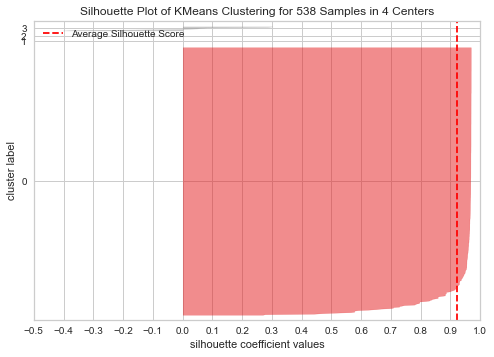

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 538 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(4)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(blockchain_matrix)
visualizer.poof()


In [9]:
from sklearn.cluster import KMeans

In [10]:
cluster = KMeans(n_clusters=4).fit(blockchain_matrix)

In [11]:
cluster_ergebnis = pd.DataFrame({"Cluster":cluster.labels_},index = blockchain_matrix.index)

In [12]:
cluster_ergebnis.sort_values("Cluster").head()

,Cluster
patent_number,
10691673,0
10764062,0
10764032,0
10764031,0
10762564,0


In [13]:
blockchain_cluster = pd.DataFrame({"Cluster":cluster.labels_}, index = blockchain_matrix.index)
blockchain_cluster.reset_index(inplace = True)

In [14]:
cluster_df = blockchain_top_groups.merge(blockchain_cluster, on = "patent_number")

In [15]:
cluster_df.head()


,patent_number,assignee_organization,cpc_group_id,Cluster
0,10013573,International Business Machines Corporation,G06F,0
1,10013573,International Business Machines Corporation,H04L,0
2,10013573,International Business Machines Corporation,G06F,0
3,10013573,International Business Machines Corporation,H04L,0
4,10026082,MASTERCARD INTERNATIONAL INCORPORATED,G06Q,0


In [16]:
cluster_agg = cluster_df.groupby(["Cluster", "assignee_organization"]).count()
cluster_agg.drop("cpc_group_id", axis = 1, inplace = True)
cluster_agg.reset_index(inplace = True)

In [17]:
# Bibliotheken importieren
from bokeh.io import output_file, save, output_notebook, show
from bokeh.models import ColumnDataSource, Title, HoverTool
from bokeh.plotting import figure
from bokeh.colors import RGB

In [18]:
# Blasengröße ergaenzen
cluster_agg = cluster_agg[cluster_agg["Cluster"] != -1]
cluster_agg['Size'] = cluster_agg['patent_number'] * 30 / cluster_agg['patent_number'].max()
source = ColumnDataSource(cluster_agg.reset_index())


In [19]:
# HoverTool konfigurieren
hover = HoverTool(tooltips=[("Anzahl", "@patent_number"),("Anmelder", "@assignee_organization"),("Patentklasse", "@cpc_group_id")])
tools = [hover, "pan","wheel_zoom","box_zoom","reset", "save"]

In [20]:
# Designs festlegen
grey_tone = RGB(220, 220, 220)
white_tone = RGB(255,255,255)

red_tone = RGB(255,0,0)
green_tone = RGB(0,255,0)
black_tone = RGB(0,0,0)

In [21]:
data_color = black_tone
background_color = white_tone
bubble_color = grey_tone

In [22]:
# Scatter initalisieren
# x_range, y_range sind so alphabetisch sortiert
scatter = figure(plot_width=1200, plot_height=1000,y_range = cluster_agg["assignee_organization"].unique(),tools=tools)

In [23]:
# Kreise hinzufügen
scatter.circle(y = 'assignee_organization', x = 'Cluster', size = 'Size',source = source,alpha = 0.8, color = bubble_color, line_alpha = 1,line_dash = 'solid', line_width = 3)

GlyphRenderer(id='1035', ...)

In [24]:
# Untertitel hinzufügen
scatter.add_layout(Title(text="Made by Tom",align = 'center',text_color = grey_tone), 'below')


In [25]:
# Design anpassen
scatter.background_fill_color = background_color
scatter.xgrid.grid_line_color = data_color
scatter.ygrid.grid_line_color= data_color
scatter.border_fill_color = background_color
scatter.yaxis.major_label_text_color = data_color
scatter.xaxis.major_label_text_color = data_color
scatter.xaxis.axis_line_color = data_color
scatter.yaxis.axis_line_color = data_color
scatter.xaxis.major_tick_line_color = data_color
scatter.yaxis.major_tick_line_color = data_color
scatter.xaxis.major_label_orientation = 1

In [26]:
# Ergebnis ausgeben
show(scatter)
#get_screenshot_as_png(scatter)